In [4]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from utils import intersection_over_union, model_test
%matplotlib inline


### Model Training
Run this part only if you want to rerun the training.

In [ ]:
model = YOLO('yolo11m.pt')
# since the training set is small, I set the batch size to 8, 
# and epochs of 200, allowing more epochs to compensate for small data.  
results = model.train(data = 'data.yaml',
                      epochs = 200,
                      batch = 8,
                      device = 'cpu',
                      optimizer = 'Adam',
                      imgsz = 640,
                      augment = True,
                      patience = 30)


### Plotting Training metrics

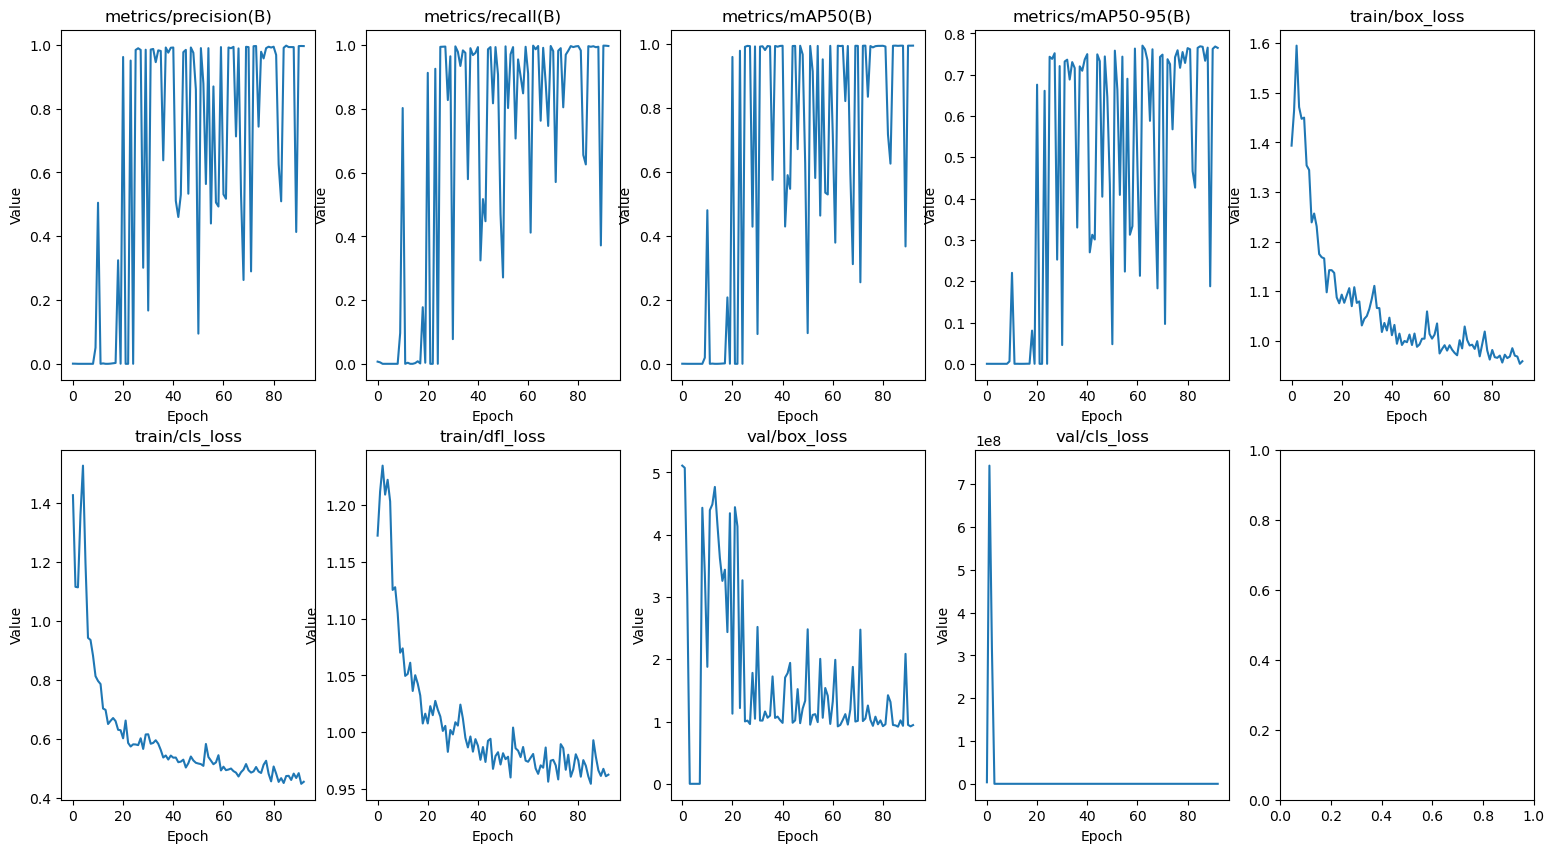

In [6]:
result_df = pd.read_csv('runs/detect/train7/results.csv')
fig, axes = plt.subplots(2,5,figsize = (19,10))
axes = axes.flatten()
metrics = ['metrics/precision(B)',
          'metrics/recall(B)',
          'metrics/mAP50(B)',
          'metrics/mAP50-95(B)',
          'train/box_loss',
          'train/cls_loss',
          'train/dfl_loss',
          'val/box_loss',
          'val/cls_loss'
          ]

for i,metric in enumerate(metrics): 
    axes[i].plot(result_df[metric])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Value')

plt.show()

### Intersection over union
The function `intersection_over_union` from `utils.py` calculates the IoU for each bounding box with all other bounding boxes (excluding self, and duplicated boxes), in case there are overlapping boxes, keep the box with higher confidence
This function `model_test` runs the test step, checks for detected objects, if yes, counts the marks on the right side, left side, and total, calls `intersection_over_union` function to check for overlapping boxes and updates the table.


### Visualize a test image or list of images 


image 1/1 /Users/shirin/Documents/Projects_implementation/LineCancellation/datasets/images/test/Image_01.png: 480x640 39 crosseds, 79.0ms
Speed: 1.7ms preprocess, 79.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


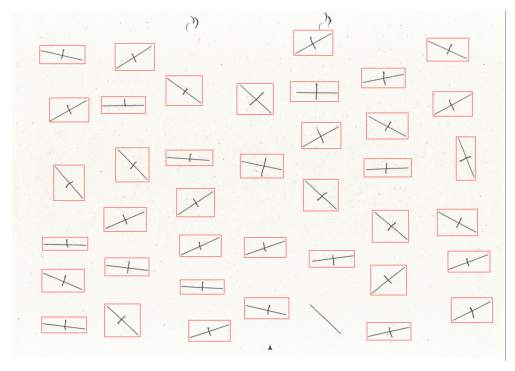

Stroke lines on the right side: 17
Stroke lines on the left side: 18
Total stroke lines 39


In [13]:
# image_list can be one test image or a directory of multiple images
model_best = YOLO('runs/detect/train7/weights/best.pt')

test_path = 'datasets/images/test'
test_image_list = ['Image_01.png'] # os.listdir(test_path)

for img in test_image_list:
    if img.endswith(".png"):
        img = os.path.join(test_path, img)
        total_marks, num_marks_left , num_marks_right, results_table,df_IoU = model_test(img, 0.5, model_best)
        print('Stroke lines on the right side:', num_marks_right)
        print('Stroke lines on the left side:', num_marks_left)
        print('Total stroke lines',total_marks)
    else:
        continue
    
